In [2]:
from maelzel.core import *

In [3]:
conf = CoreConfig()
conf['show.asoluteOffsetForDetachedObjects'] = True
conf.activate()

In [3]:
conf['show.asoluteOffsetForDetachedObjects'] = False


5


Chain([4C:1♩:offset=0.5, 4D, Chain([4E:0.5♩:offset=0.5, 4F:1♩], offset=3.0)])
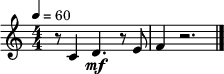

In [3]:
from maelzel.core import *
chain = Chain([
    "4C:1:offset=0.5",
    "4D:mf",
    Chain(["4E:0.5:offset=0.5", "4F:1"], offset=3, label='foo')
])

print(chain.resolvedDur())

chain.dump()
chain

In [6]:
chain.fillGaps()
chain.removeRedundantOffsets()
chain.resolvedTimes()

[(Rest:0.5♩, 0, 0.5),
 (4C:1♩, 0.5, 1),
 (4D, 1.5, 1),
 ([(Rest:0.5♩, 2.5, 0.5), (4E:0.5♩, 3, 0.5), (4F:1♩, 3.5, 1)], 2.5, 2)]

In [3]:
chain.fillGapsWithRests()
chain.dump()


Chain([Rest:0.5♩, 4C:1♩, 4D, Chain([Rest:0.5♩, 4E:0.5♩])])
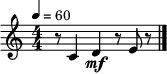

In [6]:
chain.removeRedundantOffsets()
chain.dump()
chain

Chain([Rest:0.5♩, 4C:1♩, 4D:1♩, Rest:0.5♩, 4E:0.5♩])
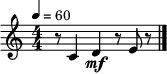

In [8]:
flat = chain.flat()
flat.removeRedundantOffsets()
flat.dump()
flat

In [10]:
for item in chain:
    print(f'{item=}, {item.offset=}, {item.dur=}, {item._resolvedOffset=}, {item._resolvedDur=}')

item=4C:0.5♩, item.offset=None, item.dur=Fraction(1, 2), item._resolvedOffset=Fraction(0, 1), item._resolvedDur=Fraction(1, 2)
item=4D, item.offset=None, item.dur=None, item._resolvedOffset=Fraction(1, 2), item._resolvedDur=Fraction(5, 2)
item=Chain([4E:0.5♩], offset=3), item.offset=Fraction(3, 1), item.dur=Fraction(1, 2), item._resolvedOffset=Fraction(3, 1), item._resolvedDur=None


In [19]:
chain.stack()
chain.removeRedundantOffsets()
chain.dump()

Chain([4C:0.5♩, 4D:2.5♩, Chain([4E:0.5♩])], offset=1/2)
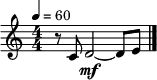

In [30]:
chain[2].parent

In [5]:
chain[1].resolvedDur()

Fraction(1, 1)

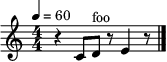

In [6]:
ch = Chain(['4C:0.5', '4D:0.5:label=foo', Chain(['4E:1:offset=0.5'])], offset=1)
ch.show()


Chain([4C:0.5♩, 4D:0.5♩, Chain([4E:1♩:offset=0.5])], offset=1)
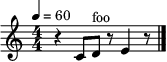

In [7]:
ch

In [3]:
struct = ScoreStruct(r'''
2/4, 60
2/4, 120
3/4, 72
''')

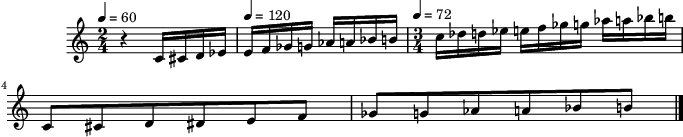

In [4]:
notes = [Note(m, 0.25) for m in range(60, 84)]
sc = Chain(notes, offset=1)
notes2 = [Note(m, 0.5) for m in range(60, 72)]
sc2 = Chain(notes2)
sc.append(sc2)
# sc.stack()
with struct:
    # sc.play()
    sc.asVoice().show()


In [4]:
sc.flat(offset=0)

AssertionError: chain.offset=Fraction(1, 1), offset=0

stackevents [4C:0.25♩, 4C#:0.25♩, 4D:0.25♩, 4D#:0.25♩, 4E:0.25♩, 4F:0.25♩, 4F#:0.25♩, 4G:0.25♩, 4G#:0.25♩, 4A:0.25♩, 4A#:0.25♩, 4B:0.25♩, 5C:0.25♩, 5C#:0.25♩, 5D:0.25♩, 5D#:0.25♩, 5E:0.25♩, 5F:0.25♩, 5F#:0.25♩, 5G:0.25♩, 5G#:0.25♩, 5A:0.25♩, 5A#:0.25♩, 5B:0.25♩] inplace=False
stackevents [4C:0.25♩, 4C#:0.25♩, 4D:0.25♩, 4D#:0.25♩, 4E:0.25♩, 4F:0.25♩, 4F#:0.25♩, 4G:0.25♩, 4G#:0.25♩, 4A:0.25♩, 4A#:0.25♩, 4B:0.25♩, 5C:0.25♩, 5C#:0.25♩, 5D:0.25♩, 5D#:0.25♩, 5E:0.25♩, 5F:0.25♩, 5F#:0.25♩, 5G:0.25♩, 5G#:0.25♩, 5A:0.25♩, 5A#:0.25♩, 5B:0.25♩] inplace=True
stackevents [4C:0.25♩, 4C#:0.25♩, 4D:0.25♩, 4D#:0.25♩, 4E:0.25♩, 4F:0.25♩, 4F#:0.25♩, 4G:0.25♩, 4G#:0.25♩, 4A:0.25♩, 4A#:0.25♩, 4B:0.25♩, 5C:0.25♩, 5C#:0.25♩, 5D:0.25♩, 5D#:0.25♩, 5E:0.25♩, 5F:0.25♩, 5F#:0.25♩, 5G:0.25♩, 5G#:0.25♩, 5A:0.25♩, 5A#:0.25♩, 5B:0.25♩] inplace=False
stackevents [4C:0.25♩, 4C#:0.25♩, 4D:0.25♩, 4D#:0.25♩, 4E:0.25♩, 4F:0.25♩, 4F#:0.25♩, 4G:0.25♩, 4G#:0.25♩, 4A:0.25♩, 4A#:0.25♩, 4B:0.25♩, 5C:0.25♩, 5C#:0.25♩, 5D:0.25♩, 5

Score(2 voices)
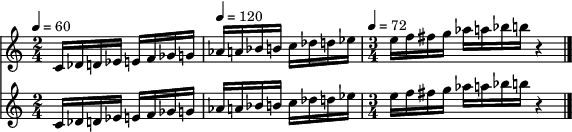

In [3]:
sco = Score(scorestruct=struct)

notes = [Note(m, 0.25) for m in range(60, 84)]
scale = Chain(notes)
sco.append(scale.asVoice())
sco.append(scale.timeShift(0.25).asVoice())
#sco.append(scale.asVoice().timeShift(1/2))
#sco.append(scale.asVoice().timeShift(3/4))
sco

stackevents [4C:0.25♩, 4C#:0.25♩, 4D:0.25♩, 4D#:0.25♩, 4E:0.25♩, 4F:0.25♩, 4F#:0.25♩, 4G:0.25♩, 4G#:0.25♩, 4A:0.25♩, 4A#:0.25♩, 4B:0.25♩, 5C:0.25♩, 5C#:0.25♩, 5D:0.25♩, 5D#:0.25♩, 5E:0.25♩, 5F:0.25♩, 5F#:0.25♩, 5G:0.25♩, 5G#:0.25♩, 5A:0.25♩, 5A#:0.25♩, 5B:0.25♩] inplace=True
Updating scorestruct index


Chain([4C:0.25♩:offset=0, 4C#:0.25♩:offset=0.25, 4D:0.25♩:offset=0.5, 4D#:0.25♩:offset=0.75, 4E:0.25♩:offset=1, 4F:0.25♩:offset=1.25, 4F#:0.25♩:offset=1.5, 4G:0.25♩:offset=1.75, 4G#:0.25♩:offset=2, 4A:0.25♩:offset=2.25, …], offset=1/4)
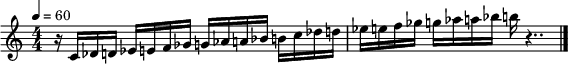

In [4]:
scale.stack()
scale.offset = F(0.25)

scale

[(Fraction(0, 1), Fraction(1, 4)), (Fraction(1, 4), Fraction(1, 2)), (Fraction(1, 2), Fraction(3, 4)), (Fraction(3, 4), Fraction(1, 1)), (Fraction(1, 1), Fraction(5, 4)), (Fraction(5, 4), Fraction(3, 2)), (Fraction(3, 2), Fraction(7, 4)), (Fraction(7, 4), Fraction(2, 1)), (Fraction(2, 1), Fraction(9, 4)), (Fraction(9, 4), Fraction(5, 2)), (Fraction(5, 2), Fraction(11, 4)), (Fraction(11, 4), Fraction(3, 1)), (Fraction(3, 1), Fraction(13, 4)), (Fraction(13, 4), Fraction(7, 2)), (Fraction(7, 2), Fraction(15, 4)), (Fraction(15, 4), Fraction(4, 1)), (Fraction(4, 1), Fraction(17, 4)), (Fraction(17, 4), Fraction(9, 2)), (Fraction(9, 2), Fraction(19, 4)), (Fraction(19, 4), Fraction(5, 1)), (Fraction(5, 1), Fraction(21, 4)), (Fraction(21, 4), Fraction(11, 2)), (Fraction(11, 2), Fraction(23, 4)), (Fraction(23, 4), Fraction(6, 1))]
stackevents [4C:0.25♩:offset=0, 4C#:0.25♩:offset=0.25, 4D:0.25♩:offset=0.5, 4D#:0.25♩:offset=0.75, 4E:0.25♩:offset=1, 4F:0.25♩:offset=1.25, 4F#:0.25♩:offset=1.5, 4G:0.

Chain([4C:0.25♩:offset=0.25, 4C#:0.25♩:offset=0.5, 4D:0.25♩:offset=0.75, 4D#:0.25♩:offset=1, 4E:0.25♩:offset=1.25, 4F:0.25♩:offset=1.5, 4F#:0.25♩:offset=1.75, 4G:0.25♩:offset=2, 4G#:0.25♩:offset=2.25, 4A:0.25♩:offset=2.5, …], offset=0)
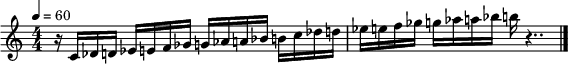

In [5]:
delta = scale.firstOffset() + scale.offset
scale.offset = F(0)
print([(item.offset, item.offset + delta) for item in scale.items])
s2 = scale.timeTransform(lambda t: t+delta)
# s2.offset = F(0)
s2.dump()
s2

In [ ]:
scale2.stack()
scale2

In [7]:
scale2.firstOffset()

Fraction(0, 1)

stackevents [4C:0.25♩:offset=0, 4C#:0.25♩:offset=0.25, 4D:0.25♩:offset=0.5, 4D#:0.25♩:offset=0.75, 4E:0.25♩:offset=1, 4F:0.25♩:offset=1.25, 4F#:0.25♩:offset=1.5, 4G:0.25♩:offset=1.75, 4G#:0.25♩:offset=2, 4A:0.25♩:offset=2.25, 4A#:0.25♩:offset=2.5, 4B:0.25♩:offset=2.75, 5C:0.25♩:offset=3, 5C#:0.25♩:offset=3.25, 5D:0.25♩:offset=3.5, 5D#:0.25♩:offset=3.75, 5E:0.25♩:offset=4, 5F:0.25♩:offset=4.25, 5F#:0.25♩:offset=4.5, 5G:0.25♩:offset=4.75, 5G#:0.25♩:offset=5, 5A:0.25♩:offset=5.25, 5A#:0.25♩:offset=5.5, 5B:0.25♩:offset=5.75] inplace=False
stackevents [4C:0.25♩:offset=0, 4C#:0.25♩:offset=0.25, 4D:0.25♩:offset=0.5, 4D#:0.25♩:offset=0.75, 4E:0.25♩:offset=1, 4F:0.25♩:offset=1.25, 4F#:0.25♩:offset=1.5, 4G:0.25♩:offset=1.75, 4G#:0.25♩:offset=2, 4A:0.25♩:offset=2.25, 4A#:0.25♩:offset=2.5, 4B:0.25♩:offset=2.75, 5C:0.25♩:offset=3, 5C#:0.25♩:offset=3.25, 5D:0.25♩:offset=3.5, 5D#:0.25♩:offset=3.75, 5E:0.25♩:offset=4, 5F:0.25♩:offset=4.25, 5F#:0.25♩:offset=4.5, 5G:0.25♩:offset=4.75, 5G#:0.25♩:offset=5

Chain([4C:0.25♩:offset=0, 4C#:0.25♩:offset=0.25, 4D:0.25♩:offset=0.5, 4D#:0.25♩:offset=0.75, 4E:0.25♩:offset=1, 4F:0.25♩:offset=1.25, 4F#:0.25♩:offset=1.5, 4G:0.25♩:offset=1.75, 4G#:0.25♩:offset=2, 4A:0.25♩:offset=2.25, …], offset=1/2)
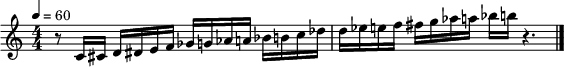

In [8]:
scale2.timeTransform(lambda t: t+0.25)

In [11]:
v = scale2.time

0.25

In [11]:
sco[0][0].setPlay(instr='saw', gain=0.1)
sco[0][3].setPlay(instr='saw', gain=0.1, position=1)
sco.setPlay(position=0)

AssertionError: events start after duration (2): 
  1/4 – 1/2 dur=1/4 tied: 
  1/2 – 3/4 dur=1/4 tied: 
  3/4 – 1/1 dur=1/4 tied: 
  1/1 – 5/4 dur=1/4 tied: 
  5/4 – 3/2 dur=1/4 tied: 
  3/2 – 7/4 dur=1/4 tied: 
  7/4 – 2/1 dur=1/4 tied: 
  2/1 – 2/1 dur=0/1 tied: →

Score(4 voices)

Voice([4C:0.25♩, 4C#:0.25♩, 4D:0.25♩, 4D#:0.25♩, 4E:0.25♩, 4F:0.25♩, 4F#:0.25♩, 4G:0.25♩, 4G#:0.25♩, 4A:0.25♩, …], offset=0)
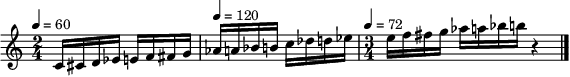

In [9]:
sco[0][0].parent

In [7]:
sco.play()



--Csound version 6.18 (double samples) Oct  1 2022
[commit: ac38f27d1c5d6ee0cacc1bc719e96be3a2d93a15]
libsndfile-1.0.31
sr = 44100.0, kr = 689.062, ksmps = 64
0dBFS level = 1.0, A4 tuning = 442.0
audio buffered in 256 sample-frame blocks
reading 1024-byte blks of shorts from adc:system:capture (RAW)
Cannot use real-time scheduling (RR/5) (1: Operation not permitted)
JackClient::AcquireSelfRealTime error
writing 512 sample blks of 64-bit floats to dac:system:playback
SECTION 1:


Button(description='Stop', style=ButtonStyle())

Output()

SynthGroup(n=96)
    Synth(𝍪 preset.saw:501.0002, p4=0 idataidx_:5=19 inumbps:6=2 ibplen:7=3 igain:8=0.1 ichan:9=1 ipos:10=0 ifadein:11=0.02 ifadeout:12=0.02 ipchintrp_:13=0 ifadekind:14=1 ktransp:15=0 klag:16=0.1 kfreqratio:17=0 kQ:18=3 p19=0 p20=60 p21=0.515178 p22=0.25 ...)
    Synth(𝍪 preset._piano:502.0002, p4=0 idataidx_:5=15 inumbps:6=2 ibplen:7=3 igain:8=1 ichan:9=1 ipos:10=0 ifadein:11=0.02 ifadeout:12=0.02 ipchintrp_:13=0 ifadekind:14=1 p15=0 p16=61 ...)
    Synth(𝍪 preset._piano:502.0003, p4=0 idataidx_:5=15 inumbps:6=2 ibplen:7=3 igain:8=1 ichan:9=1 ipos:10=0 ifadein:11=0.02 ifadeout:12=0.02 ipchintrp_:13=0 ifadekind:14=1 p15=0 p16=62 ...)
    Synth(𝍪 preset.saw:501.0003, p4=0 idataidx_:5=19 inumbps:6=2 ibplen:7=3 igain:8=0.1 ichan:9=1 ipos:10=1 ifadein:11=0.02 ifadeout:12=0.02 ipchintrp_:13=0 ifadekind:14=1 ktransp:15=0 klag:16=0.1 kfreqratio:17=0 kQ:18=3 p19=0 p20=63 p21=0.515178 p22=0.25 ...)
    Synth(𝍪 preset._piano:502.0004, p4=0 idataidx_:5=15 inumbps:6=2 ibplen:7=3 igain:8=1 ichan:9=1 ipos:10=0 ifadein:11=0.02 ifadeout:12=0.02 ipchintrp_:13=0 ifadekind:14=1 p15=0 p16=64 ...)
    Synth(𝍪 preset._piano:502.0005, p4=0 idataidx_:5=15 inumbps:6=2 ibplen:7=3 igain:8=1 ichan:9=1 ipos:10=0 ifadein:11=0.02 ifadeout:12=0.02 ipchintrp_:13=0 ifadekind:14=1 p15=0 p16=65 ...)
    Synth(𝍪 preset._piano:502.0006, p4=0 idataidx_:5=15 inumbps:6=2 ibplen:7=3 igain:8=1 ichan:9=1 ipos:10=0 ifadein:11=0.02 ifadeout:12=0.02 ipchintrp_:13=0 ifadekind:14=1 p15=0 p16=66 ...)
    Synth(𝍪 preset._piano:502.0007, p4=0 idataidx_:5=15 inumbps:6=2 ibplen:7=3 igain:8=1 ichan:9=1 ipos:10=0 ifadein:11=0.02 ifadeout:12=0.02 ipchintrp_:13=0 ifadekind:14=1 p15=0 p16=67 ...)
    Synth(𝍪 preset._piano:502.0008, p4=0 idataidx_:5=15 inumbps:6=2 ibplen:7=3 igain:8=1 ichan:9=1 ipos:10=0 ifadein:11=0.02 ifadeout:12=0.02 ipchintrp_:13=0 ifadekind:14=1 p15=0 p16=68 ...)
    Synth(𝍪 preset._piano:502.0009, p4=0 idataidx_:5=15 inumbps:6=2 ibplen:7=3 igain:8=1 ichan:9=1 ipos:10=0 ifadein:11=0.02 ifadeout:12=0.02 ipchintrp_:13=0 ifadekind:14=1 p15=0 p16=69 ...)
    Synth(𝍪 preset._piano:502.001, p4=0 idataidx_:5=15 inumbps:6=2 ibplen:7=3 igain:8=1 ichan:9=1 ipos:10=0 ifadein:11=0.02 ifadeout:12=0.02 ipchintrp_:13=0 ifadekind:14=1 p15=0 p16=70 ...)
    Synth(𝍪 preset._piano:502.0011, p4=0 idataidx_:5=15 inumbps:6=2 ibplen:7=3 igain:8=1 ichan:9=1 ipos:10=0 ifadein:11=0.02 ifadeout:12=0.02 ipchintrp_:13=0 ifadekind:14=1 p15=0 p16=71 ...)
    Synth(𝍪 preset._piano:502.0012, p4=0 idataidx_:5=15 inumbps:6=2 ibplen:7=3 igain:8=1 ichan:9=1 ipos:10=0 ifadein:11=0.02 ifadeout:12=0.02 ipchintrp_:13=0 ifadekind:14=1 p15=0 p16=72 ...)
    Synth(𝍪 preset._piano:502.0013, p4=0 idataidx_:5=15 inumbps:6=2 ibplen:7=3 igain:8=1 ichan:9=1 ipos:10=0 ifadein:11=0.02 ifadeout:12=0.02 ipchintrp_:13=0 ifadekind:14=1 p15=0 p16=73 ...)
    Synth(𝍪 preset._piano:502.0014, p4=0 idataidx_:5=15 inumbps:6=2 ibplen:7=3 igain:8=1 ichan:9=1 ipos:10=0 ifadein:11=0.02 ifadeout:12=0.02 ipchintrp_:13=0 ifadekind:14=1 p15=0 p16=74 ...)
    Synth(𝍪 preset._piano:502.0015, p4=0 idataidx_:5=15 inumbps:6=2 ibplen:7=3 igain:8=1 ichan:9=1 ipos:10=0 ifadein:11=0.02 ifadeout:12=0.02 ipchintrp_:13=0 ifadekind:14=1 p15=0 p16=75 ...)
    Synth(𝍪 preset._piano:502.0016, p4=0 idataidx_:5=15 inumbps:6=2 ibplen:7=3 igain:8=1 ichan:9=1 ipos:10=0 ifadein:11=0.02 ifadeout:12=0.02 ipchintrp_:13=0 ifadekind:14=1 p15=0 p16=76 ...)
    Synth(𝍪 preset._piano:502.0017, p4=0 idataidx_:5=15 inumbps:6=2 ibplen:7=3 igain:8=1 ichan:9=1 ipos:10=0 ifadein:11=0.02 ifadeout:12=0.02 ipchintrp_:13=0 ifadekind:14=1 p15=0 p16=77 ...)
    Synth(𝍪 preset._piano:502.0018, p4=0 idataidx_:5=15 inumbps:6=2 ibplen:7=3 igain:8=1 ichan:9=1 ipos:10=0 ifadein:11=0.02 ifadeout:12=0.02 ipchintrp_:13=0 ifadekind:14=1 p15=0 p16=78 ...)
    Synth(𝍪 preset._piano:502.0019, p4=0 idataidx_:5=15 inumbps:6=2 ibplen:7=3 igain:8=1 ichan:9=1 ipos:10=0 ifadein:11=0.02 ifadeout:12=0.02 ipchintrp_:13=0 ifadekind:14=1 p15=0 p16=79 ...)
    Synth(𝍪 preset._pian